In [145]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [146]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [147]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [148]:
############# WRITE THE CODE IN THIS CELL ####################
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer




In [149]:
# importing our datasets 
tweet = pd.read_csv('Tweets.csv')

In [150]:
  tweet.shape

(40000, 2)

In [203]:
df = tweet.sample(n=10000, random_state = 10)
df.reset_index(drop=True,inplace=True)

In [204]:
df.dropna(inplace=True)

In [153]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
%matplotlib notebook


<IPython.core.display.Javascript object>


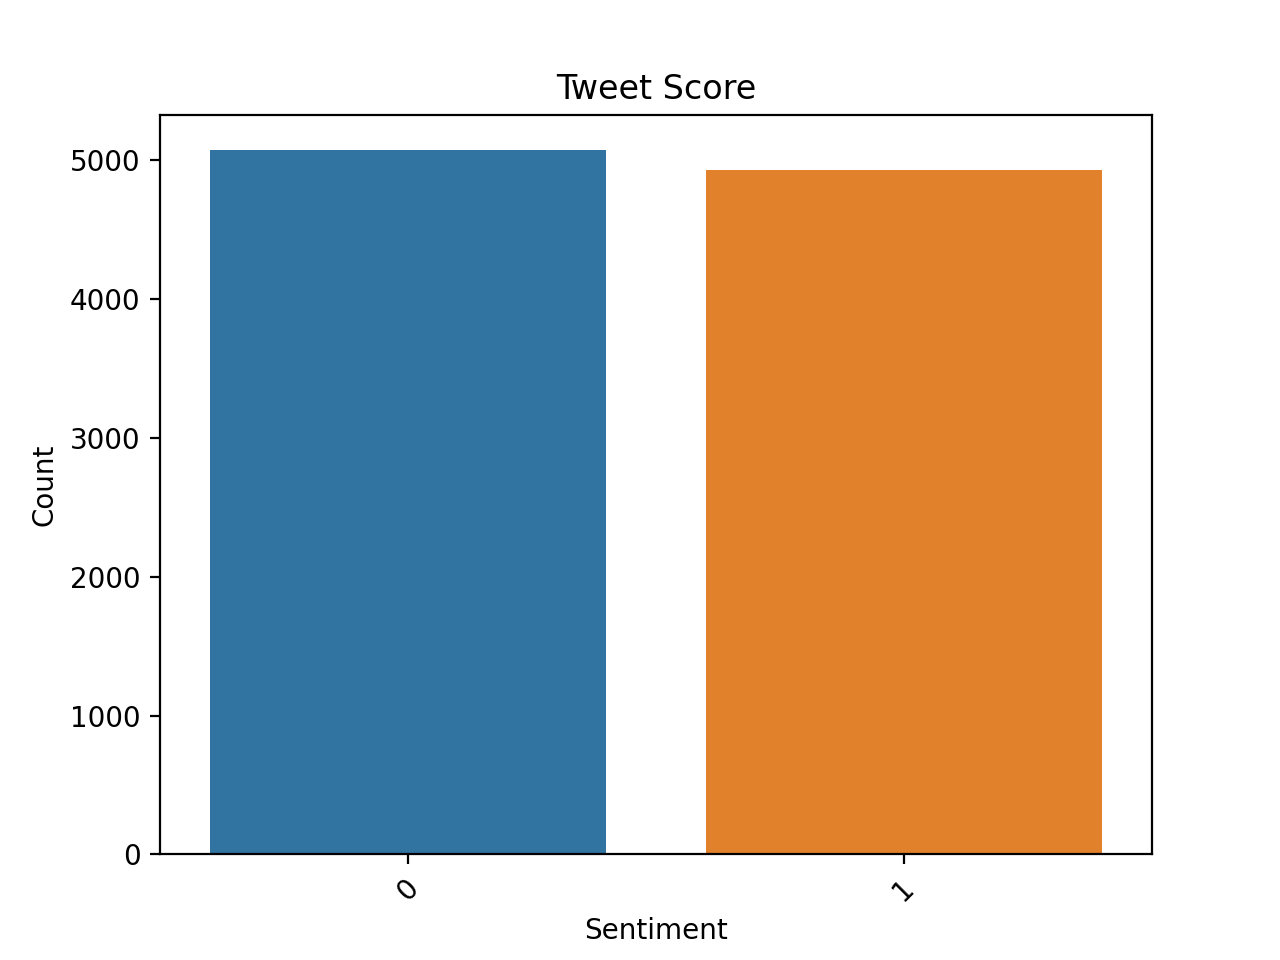

In [154]:
import seaborn as sns

# Visualizing the tweet score (sentimet column)
sns.countplot(x='sentiment', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweet Score')
plt.xticks(rotation=45)
plt.show()


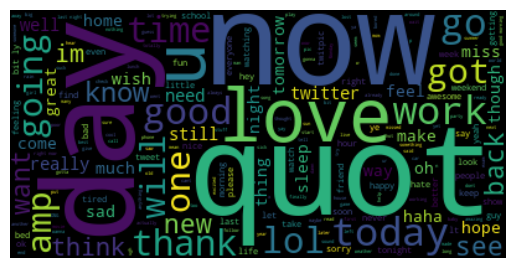

In [156]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update()
textt = " ".join(review for review in df.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [157]:
#checking to word usuage to remove the redundant words 
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [158]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

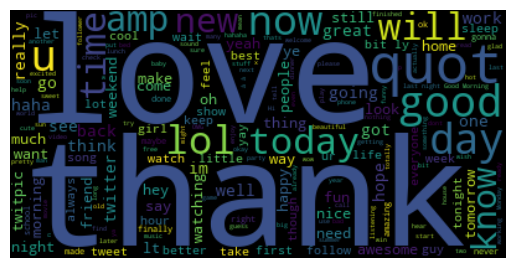

In [159]:
# Word cloud positive
stopwords = set(STOPWORDS)
#stopwords.update()
pos = " ".join(review for review in positive.tweet)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

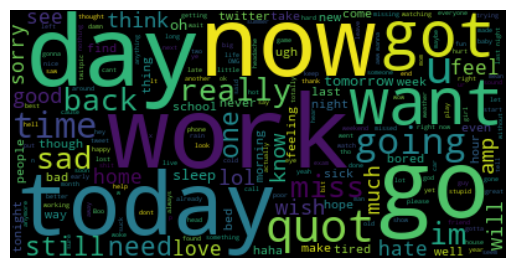

In [160]:
# word cloud negative

neg = " ".join(str(review) for review in negative.tweet)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [162]:
# Tweet Distribution
df['sentiment'] = df['sentiment'].replace({0 : 'negative'})
df['sentiment'] = df['sentiment'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentiment")
fig.update_traces(marker_color="black",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='TWEET SENTIMENT')
fig.show()

DATA CLEANING

In [205]:
# Removing punctuation method 2
import string
string.punctuation
df['tweetss']=df['tweet'].apply(lambda x:''.join(i for i in x if i not in string.punctuation))

In [206]:
# removing punctuation method 1
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',",","@","[ ]"))
    return final
df['tweetss'] = df['tweet'].apply(remove_punctuation)

In [207]:
# Stopwords to reduce words base on importance 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
df['tweetss']=df.tweetss.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dessy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [208]:
#Leaving all text at lower case 
df['tweetss'] = df['tweetss'].apply(lambda x: " ".join(x.lower()  for x in x.split()))

In [209]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Download necessary resources if not already downloaded
nltk.download('punkt')

# Assuming 'df' is your DataFrame with a column named 'tweet'
# Apply word_tokenize to each tweet in the 'tweet' column
df['tweetss'] = df['tweetss'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dessy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [210]:
import textblob
from textblob import Word

# Convert list elements to strings and then lemmatize
df['tweetss'] = df['tweetss'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))


In [211]:
#visualizing the preprocessing output
df.head()

,sentiment,tweet,tweetss
0,0,"Watching the GP, enjoying the sun, doing revis...",watching gp enjoying sun revision
1,0,At work I also wana do a job that I enjoy....,at work i also wana job i enjoy
2,0,"he thinkgs ignore me will solve OUR problems, ...",thinkgs ignore solve our problem doesnt know i...
3,1,@J2thaESSICA your welcome! I miss you too!! I...,j2thaessica welcome i miss i 'm jst finishing ...
4,1,@Saxeyyy I like where your heads at. Great min...,saxeyyy i like head great mind think alike


In [171]:
#CLASSIFICATION

In [212]:
# Extracting input and output
X=df['tweetss']
# X=df['Text']
y=df['sentiment']

In [213]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(X)


In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)

In [215]:
# Step 1: defining the classification models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()
NB = GaussianNB()
LR = LogisticRegression()

In [216]:
# Step 2: training the models
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train,y_train)
NB.fit(X_train.toarray(),y_train)

GaussianNB()

In [217]:
#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test.toarray())

In [218]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

Text(0.5, 1.0, 'NB')

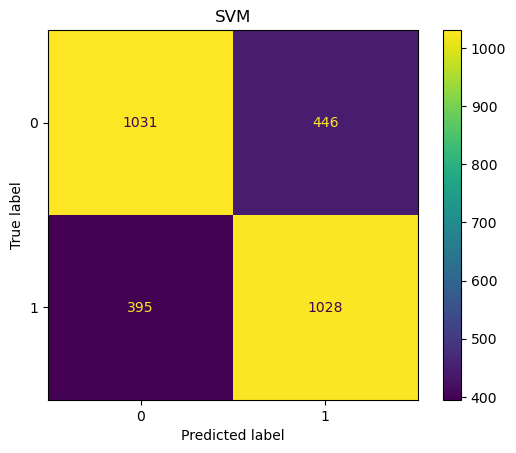

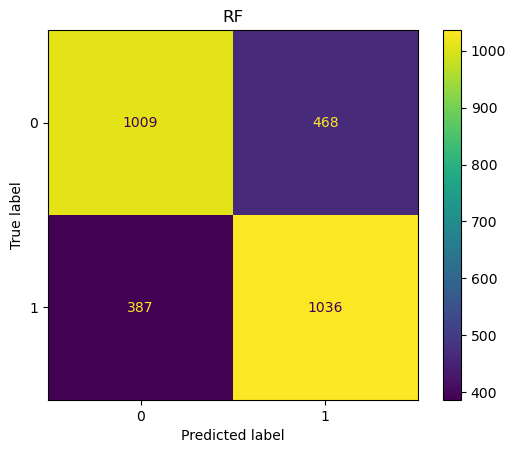

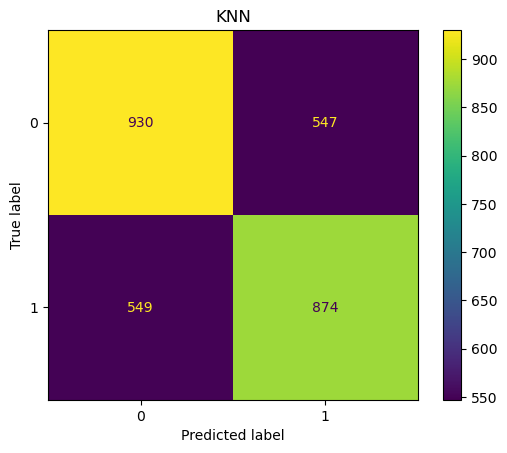

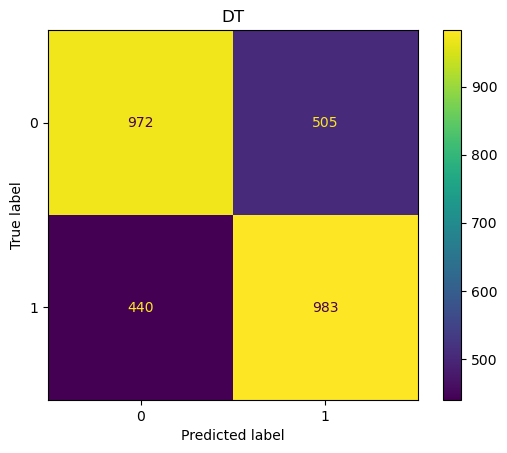

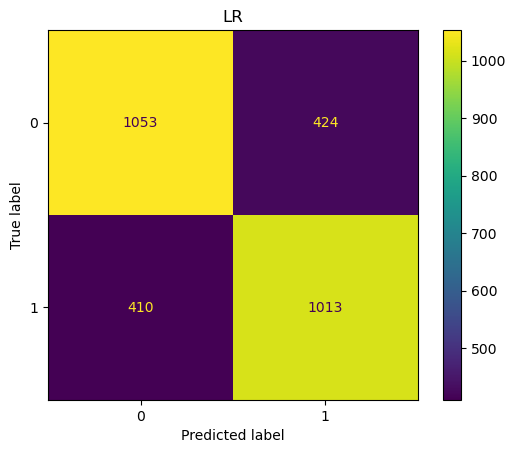

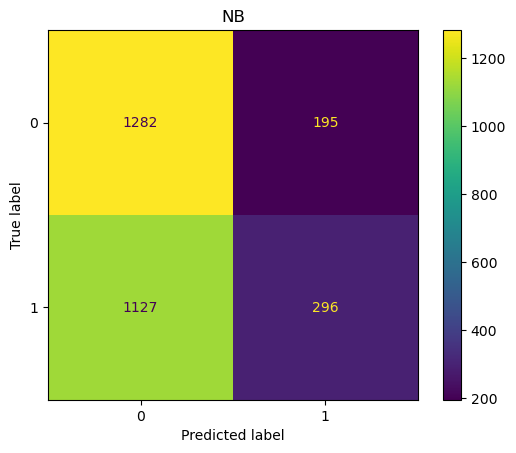

In [219]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")

cm5 = confusion_matrix(y_test, y_pred5, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=DT.classes_)
disp.plot()
plt.title("LR")

cm6 = confusion_matrix(y_test, y_pred6, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=DT.classes_)
disp.plot()
plt.title("NB")

In [220]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')
print('LR metrics\n')
confusion_metrics(cm5)
print('\n\n')
print('NB metrics\n')
confusion_metrics(cm6)
print('\n\n')

SVM metrics

True Positives: 1028
True Negatives: 1031
False Positives: 446
False Negatives: 395
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.72
Specificity: 0.7
Precision: 0.7
f_1 Score: 0.71



RF metrics

True Positives: 1036
True Negatives: 1009
False Positives: 468
False Negatives: 387
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.73
Specificity: 0.68
Precision: 0.68
f_1 Score: 0.7



KNN metrics

True Positives: 874
True Negatives: 930
False Positives: 547
False Negatives: 549
--------------------------------------------------
Accuracy: 0.62
Mis-Classification: 0.38
Sensitivity: 0.61
Specificity: 0.63
Precision: 0.63
f_1 Score: 0.62



DT metrics

True Positives: 983
True Negatives: 972
False Positives: 505
False Negatives: 440
--------------------------------------------------
Accuracy: 0.67
Mis-Classification: 0.33
Sensitivity: 0.69
Specificity: 0.66
Precisio

INTRODUCTION

The study examines a dataset of tweets gathered from a social media site during a given time frame. Preprocessing the data, visualising the sentiment distribution, and doing sentiment analysis with different classification models are the goals.

DATA PREPROCESSING 

Sampling: A sample of 10,000 tweets was chosen for analysis due to the dataset's large size.

Data cleaning: To make the tweet text ready for analysis, stopwords and punctuation were eliminated.

Visualisation of Word Clouds: To show the most common words connected to each sentiment category, word clouds were created for tweets with both positive and negative sentiment.

Sentiment Visualisation: To comprehend the overall sentiment distribution in the dataset, the distribution of sentiment scores—0 being negative with outputs like (TIRED,BAD,SAD....) and 1 being positive got outputs like (LOL,LOVE,THANK,WELL,DAY,WATCH,FRIEND,NICE ......) —was visualised.

Text cleaning techniques like punctuation marks removal, stopword removal, and lowercase conversion are used to preprocess tweets, with tokenization and lemmatization techniques further cleaning the data.

CLASSIFICATION

Afterwards, a variety of classification models, such as Support Vector Machine (SVM), Random Forest (RF), K-Nearest Neighbours (KNN), Decision Tree (DT), Logistic Regression (LR), and Naive Bayes (NB), are trained on the preprocessed text data.

A test set is used to assess the classification models using a variety of evaluation metrics, including accuracy, precision, recall, and F1-score. The models are trained on the training set.
To see how well each classification model is performing, confusion matrices are created.

The accuracy metric shows how accurate the model's predictions are overall.

* Sensitivity (True Positive Rate) indicate the percentage of actual positive instances that were correctly identified by the model.

* Specificity (True Negative Rate) indicates the percentege of actual negative instances that were correctly specified by the model.

* Precision calculates the proportion of true positive predictions among all positive predictions made by the model.

* When the classes are unbalanced, the F1 Score is helpful because it strikes a balance between recall (sensitivity) and precision.

* The percentage of inaccurate forecasts the model produced is indicated by the mis-classification rate.


These measures show that the Random Forest and Logistic Regression models perform relatively high in terms of accuracy and balance in terms of sensitivity, specificity, precision, and F1 score. On the other hand, the Naive Bayes model exhibits poorer performance metrics, especially with regard to sensitivity and F1 score, suggesting that it might have problems correctly predicting positive sentiment.


In summary:

The dataset analysis sheds light on how the tweets' sentiments are distributed.

The performance of the classification models in predicting sentiment varies.

It might be necessary to further optimise the classification models in order to increase accuracy and overall performance.

The knowledge gleaned from this analysis can be helpful in identifying trends in public opinion on social media platforms.


TOTAL WORDS (451)